In [2]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [4]:
# dissolve when difference percent is 5%
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Dissolving_criteria/gc_2x25_lagrange_Dissolve5'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc.20150201_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
LA1              = NcFile1.variables['SpeciesConc_PASV_LA']
LA11             = NcFile1.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA1 = LA1 + LA11

# dissolve when difference percent is 10%
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Dissolving_criteria/gc_2x25_lagrange_Dissolve10'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc.20150201_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
LA2              = NcFile2.variables['SpeciesConc_PASV_LA']
LA22             = NcFile2.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA2 = LA2 + LA22

# dissolve when difference percent is 15%
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Dissolving_criteria/gc_2x25_lagrange_Dissolve15'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.20150201_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
LA3              = NcFile3.variables['SpeciesConc_PASV_LA']
LA33             = NcFile3.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA3 = LA3 + LA33

# # dissolve when difference percent is 40% or 1%
# FILEDIR4 = '/n/home12/hongwei/HONGWEI/sensitive_test/dissolve_criteria/merra2_2x25_standard_dissovle1/'
# NcFile4   = Dataset(FILEDIR4+'GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

# lat4             = NcFile4.variables['lat'][:]
# lon4             = NcFile4.variables['lon'][:]
# EU4              = NcFile4.variables['SpeciesConc_PASV_EU']
# LA4              = NcFile4.variables['SpeciesConc_PASV_LA']


LA1.shape

(28, 72, 91, 144)

In [5]:
#------------------------------------------------
# total area in each grid  ------------------
#------------------------------------------------ 
GC_AREA = NcFile1.variables['AREA']


#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

AD_file = open(FILEDIR1+'/State_Met_AD.txt','r')

GC_AD = LA1[0,:,:,:]*0.0

Nx = len(LA1[0,0,0,:])
Ny = len(LA1[0,0,:,0])
Nz = len(LA1[0,:,0,0])
Nt = len(LA1[:,0,0,0])

for ix in range(Nx):
    for iy in range(Ny):
        for iz in range(Nz):
            line = AD_file.readline()
            GC_AD[iz,iy,ix] = float(line)
            

In [6]:
### change unit, do average

LA1_molec = LA1[:,:,:,:]*0.0
for i in range(Nt):
    LA1_molec[i,:,:,:] = LA1[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA1_Zsum = np.sum(LA1_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA1_Zsum[i,:,:]   = LA1_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA1_Zsum_Xmean = np.mean(LA1_Zsum[:,:,:], axis=2)


In [7]:

LA2_molec = LA2[:,:,:,:]*0.0
for i in range(Nt):
    LA2_molec[i,:,:,:] = LA2[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA2_Zsum = np.sum(LA2_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA2_Zsum[i,:,:]   = LA2_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA2_Zsum_Xmean = np.mean(LA2_Zsum[:,:,:], axis=2)

In [8]:

LA3_molec = LA3[:,:,:,:]*0.0
for i in range(Nt):
    LA3_molec[i,:,:,:] = LA3[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA3_Zsum = np.sum(LA3_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA3_Zsum[i,:,:]   = LA3_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA3_Zsum_Xmean = np.mean(LA3_Zsum[:,:,:], axis=2)

In [9]:

# LA4_molec = LA4[:,:,:,:]*0.0
# for i in range(Nt):
#     LA4_molec[i,:,:,:] = LA4[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


# LA4_Zsum = np.sum(LA4_molec[:,:,:,:], axis=1)
# for i in range(Nt):
#     LA4_Zsum[i,:,:]   = LA4_Zsum[i,:,:]/GC_AREA[:,:]/1e4

# LA4_Zsum_Xmean = np.mean(LA4_Zsum[:,:,:], axis=2)

In [10]:
# delete original variable to save memory
del LA1, LA2, LA3

Total mass [molec] in the end: 
plume dissovle 1  = 1.0949710362583434e+30
plume dissolve 5  = 1.1080420177778805e+30
plume dissolve 10 = 1.1090285768045498e+30


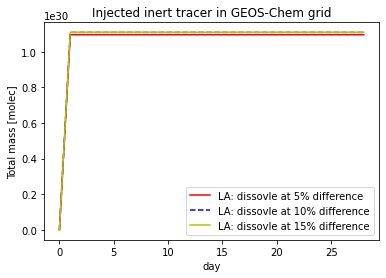

In [12]:
t = Nt-1
print(f'Total mass [molec] in the end: ')
print(f'plume dissovle 1  = {np.sum(LA1_molec[t,:,:,:])}')
print(f'plume dissolve 5  = {np.sum(LA2_molec[t,:,:,:])}')
print(f'plume dissolve 10 = {np.sum(LA3_molec[t,:,:,:])}')

LA1_mass = [0]
LA2_mass = [0]
LA3_mass = [0]
# LA4_mass = [0]

days = [0]

for i in range(Nt):
    days.append(i+1)
    LA1_mass.append(np.sum(LA1_molec[i,:,:,:]))
    LA2_mass.append(np.sum(LA2_molec[i,:,:,:]))
    LA3_mass.append(np.sum(LA3_molec[i,:,:,:]))
#     LA4_mass.append(np.sum(LA4_molec[i,:,:,:]))


plt.plot(days, LA1_mass, 'r', label='LA: dissovle at 5% difference');
plt.plot(days, LA2_mass, 'b--', label='LA: dissovle at 10% difference');
plt.plot(days, LA3_mass, 'y', label='LA: dissovle at 15% difference');
# plt.plot(days, LA4_mass, 'c--', label='LA: dissovle at 1% difference');

# plt.plot(days, EU1_mass, 'k', label='Eularian');
# plt.plot(days, EU2_mass, 'y--', label='EU: split to 5');
# plt.plot(days, EU3_mass, 'b.', label='EU: split to 7');

plt.title('Injected inert tracer in GEOS-Chem grid');
plt.xlabel('day');
plt.ylabel('Total mass [molec]');
plt.legend();

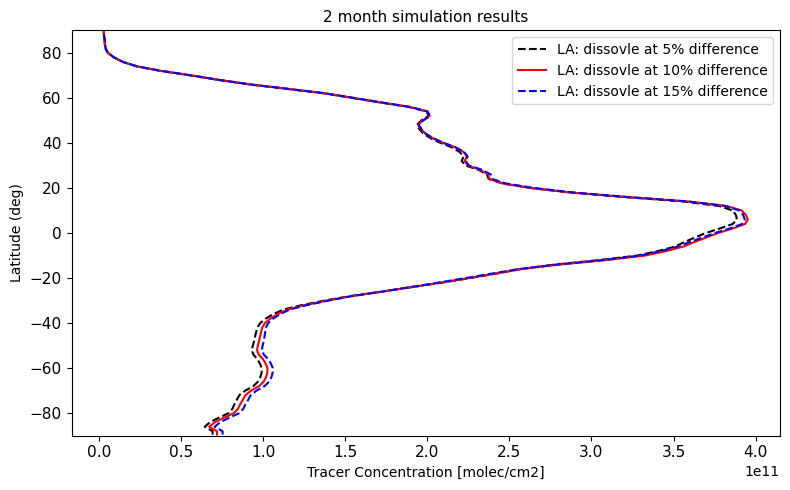

In [34]:
fig = plt.figure(figsize=(8,5),dpi=100);
#     gs = fig.add_gridspec(15, 8)
i=Nt-1
# plt.suptitle('Day: '+str(i+1), fontsize=16);


    
plt.plot(LA1_Zsum_Xmean[-1,:], lat1, 'k--', label='LA: dissovle at 5% difference');
plt.plot(LA2_Zsum_Xmean[-1,:], lat2, 'r', label='LA: dissovle at 10% difference');
plt.plot(LA3_Zsum_Xmean[-1,:], lat3, 'b--', label='LA: dissovle at 15% difference');
# plt.plot(LA4_Zsum_Xmean[i,:], lat4, 'c--', label='LA: dissovle at 1% difference');

# plt.plot(EU1_Zsum_Xmean[i,:], lat1, 'y', label='EU');



# X_max = np.max(LA1_Zsum_Xmean[:,:],axis=(0,1)) # 16.5e+11;
# plt.xlim(0,X_max);
plt.ylim(-90,90);

plt.xlabel('Tracer Concentration [molec/cm2]');
plt.ylabel('Latitude (deg)');
plt.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
plt.tick_params(axis='y', labelsize=11)
plt.legend()
plt.title('2 month simulation results', fontsize=11);
    
    
plt.tight_layout()


In [18]:
days = np.arange(1,32,1)

df10_life   = pd.read_fwf(FILEDIR1+'/Plume_lifetime_seconds.txt', header=None)
df10_number = pd.read_fwf(FILEDIR1+'/Plume_number.txt', header=None)

Num1_plume = df10_number.loc[:,3]
Num1_2D = df10_number.loc[:,1]
Num1_1D = df10_number.loc[:,0]
Num1_dissolved = df10_number.loc[:,2]
lifetime1 = df10_life.loc[:,1]/(3600*24)


df20_life   = pd.read_fwf(FILEDIR2+'/Plume_lifetime_seconds.txt', header=None)
df20_number = pd.read_fwf(FILEDIR2+'/Plume_number.txt', header=None)

Num2_plume = df20_number.loc[:,3]
Num2_2D = df20_number.loc[:,1]
Num2_1D = df20_number.loc[:,0]
Num2_dissolved = df20_number.loc[:,2]
lifetime2 = df20_life.loc[:,1]/(3600*24)


df30_life   = pd.read_fwf(FILEDIR3+'/Plume_lifetime_seconds.txt', header=None)
df30_number = pd.read_fwf(FILEDIR3+'/Plume_number.txt', header=None)

Num3_plume = df30_number.loc[:,3]
Num3_2D = df30_number.loc[:,1]
Num3_1D = df30_number.loc[:,0]
Num3_dissolved = df30_number.loc[:,2]
lifetime3 = df30_life.loc[:,1]/(3600*24)



# FILEDIR4    = '/n/home12/hongwei/HONGWEI/sensitive_test/dissolve_criteria/merra2_2x25_standard_dissovle1/'
# df40_life   = pd.read_fwf(FILEDIR4+'Plume_lifetime_seconds.txt', header=None)
# df40_number = pd.read_fwf(FILEDIR4+'Plume_number.txt', header=None)

# Num4_plume = df40_number.loc[:,8]
# Num4_2D = df40_number.loc[:,7]
# Num4_1D = df40_number.loc[:,6]
# Num4_dissolved = df40_number.loc[:,9]
# lifetime4 = df40_life.loc[:,1]/(3600*24)

In [19]:
df10_life.head()

,0,1
0,18.0,73800.0
1,19.0,75600.0
2,3075.0,76800.0
3,20.0,77400.0
4,3091.0,78600.0


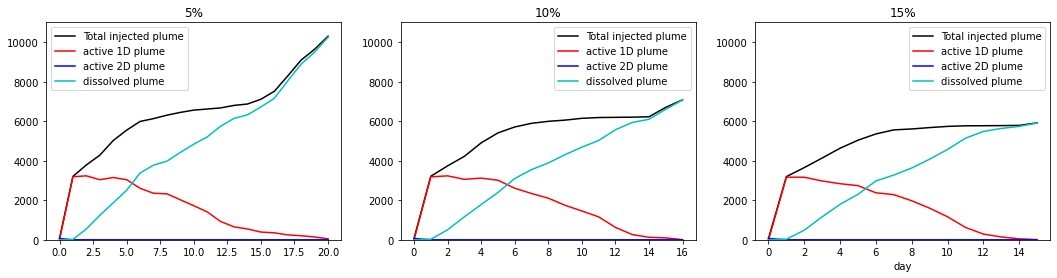

In [32]:
fig = plt.figure(figsize=(18,4));
#     gs = fig.add_gridspec(15, 8)
max_num=1.1e4

ax1 = plt.subplot(1,3,1);
ax1.plot(Num1_plume, 'k', label='Total injected plume')
ax1.plot(Num1_1D, 'r', label='active 1D plume')
ax1.plot(Num1_2D, 'b', label='active 2D plume')
ax1.plot(Num1_dissolved, 'c', label='dissolved plume')
ax1.legend()
ax1.set_title('5%')
ax1.set_ylim(0,max_num)


ax2 = plt.subplot(1,3,2);
ax2.plot(Num2_plume, 'k', label='Total injected plume')
ax2.plot(Num2_1D, 'r', label='active 1D plume')
ax2.plot(Num2_2D, 'b', label='active 2D plume')
ax2.plot(Num2_dissolved, 'c', label='dissolved plume')
ax2.legend()
ax2.set_title('10%')
ax2.set_ylim(0,max_num)


ax3 = plt.subplot(1,3,3);
ax3.plot(Num3_plume, 'k', label='Total injected plume')
ax3.plot(Num3_1D, 'r', label='active 1D plume')
ax3.plot(Num3_2D, 'b', label='active 2D plume')
ax3.plot(Num3_dissolved, 'c', label='dissolved plume')
ax3.legend()
ax3.set_title('15%')
ax3.set_ylim(0,max_num)


# ax4 = plt.subplot(2,2,4);
# ax4.plot(Num4_plume, 'k', label='Total injected plume')
# ax4.plot(Num4_1D, 'r', label='active 1D plume')
# ax4.plot(Num4_2D, 'b', label='active 2D plume')
# ax4.plot(Num4_dissolved, 'c', label='dissolved plume')
# ax4.set_title('1%')

# plt.title('(a) Number of plumes in different types')
plt.xlabel('day');
# plt.ylabel('number')



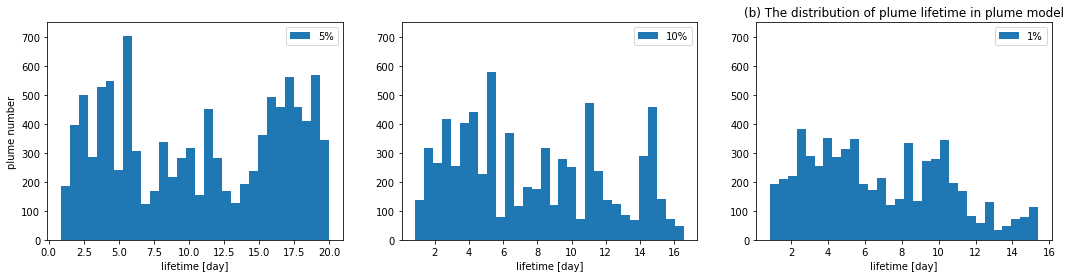

In [30]:
fig = plt.figure(figsize=(18,4));
#     gs = fig.add_gridspec(15, 8)

max_num = 750

ax1 = plt.subplot(1,3,1);
ax1.hist(lifetime1, bins=30, label='5%')
ax1.set_ylim(0,max_num)
ax1.legend()
ax1.set_xlabel('lifetime [day]');
ax1.set_ylabel('plume number');

ax2 = plt.subplot(1,3,2);
ax2.hist(lifetime2, bins=30, label='10%')
ax2.set_ylim(0,max_num)
ax2.legend()
ax2.set_xlabel('lifetime [day]');
# ax2.set_ylabel('plume number');

ax3 = plt.subplot(1,3,3);
ax3.hist(lifetime3, bins=30, label='1%')
ax3.set_ylim(0,max_num)
ax3.legend()
ax3.set_xlabel('lifetime [day]');
# ax3.set_ylabel('plume number');

# ax4 = plt.subplot(2,2,4);
# ax4.hist(lifetime4, bins=30, label='1%')
# ax4.set_ylim(0,max_num)
# ax4.legend()

# plt.xlabel('lifetime [day]');
# plt.ylabel('plume number');
# plt.title('(b) The distribution of plume lifetime in plume model');